In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [147]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [149]:
df.describe()

,CustomerID,Age,Income,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [150]:
# mapping Genre into numerical value (on hot encoding)
df['Genre'] = df['Genre'].map({'Male':0, "Female":1})

In [151]:
df

,CustomerID,Genre,Age,Income,Spending
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [152]:
kclusters = range(1,30)
inertia = []
for i in kclusters:
    kmeans = KMeans(n_clusters=i)
    # kmeans.fit(df.drop('CustomerID', axis=1))
    kmeans.fit(df[['Income', 'Spending']])
    inertia.append(kmeans.inertia_)

inertia

[269981.28,
 182440.30762987013,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.814510710006,
 30566.45113025186,
 25011.839349156595,
 21850.16528258563,
 19657.783608703958,
 17546.51567878991,
 15810.343426539728,
 14638.40107003212,
 12813.669618144619,
 12219.592676857923,
 10870.920323536113,
 10305.383456604493,
 9088.700205350204,
 8693.84847302456,
 8446.485897435898,
 7535.165860058452,
 7329.892633097897,
 6915.224240493805,
 6405.022173079758,
 6169.129426129426,
 5681.488865084901,
 5541.587157287157,
 5373.239072039072,
 4894.647000222]

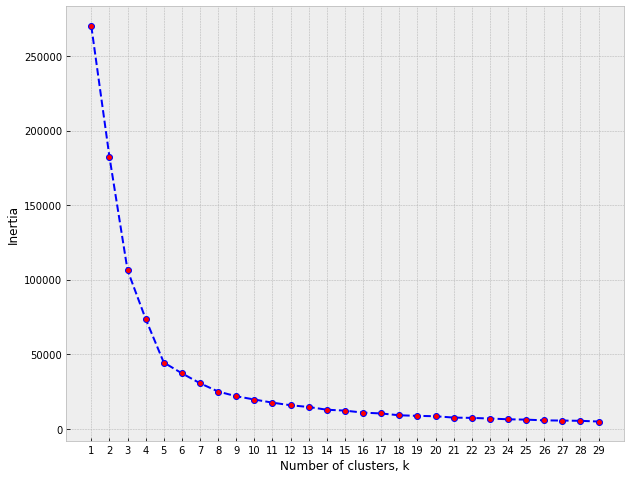

In [153]:
plt.figure(figsize=(10,8)) 
plt.style.use('bmh')

plt.plot(kclusters, inertia, 'b--o', markerfacecolor='red')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(kclusters)
plt.show()

In [154]:
df_inertia = pd.DataFrame({'inertia':inertia})
df_inertia['diff'] = df_inertia['inertia'].diff().abs()
df_inertia

,inertia,diff
0,269981.280000,NaN
1,182440.307630,87540.972370
2,106348.373062,76091.934568
3,73679.789039,32668.584023
4,44448.455448,29231.333592
5,37233.814511,7214.640937
6,30566.451130,6667.363380
7,25011.839349,5554.611781
8,21850.165283,3161.674067
9,19657.783609,2192.381674


Number of Clusters = 5

In [155]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df.drop('CustomerID', axis=1))

KMeans(n_clusters=5, random_state=42)

In [156]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [157]:
df_res = df.copy()
df_res['ClusterLabel'] = kmeans.labels_
df_res

,CustomerID,Genre,Age,Income,Spending,ClusterLabel
0,1,0,19,15,39,0
1,2,0,21,15,81,4
2,3,1,20,16,6,0
3,4,1,23,16,77,4
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,2
197,198,0,32,126,74,1
198,199,0,32,137,18,2


/Users/m.abdurrahmanshidiq/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


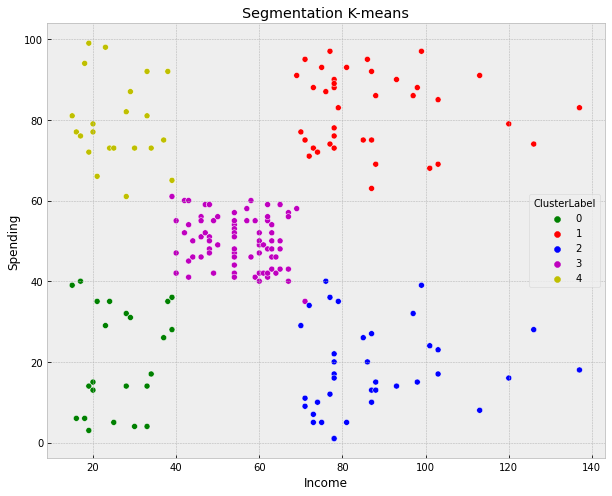

In [158]:
plt.figure(figsize = (10, 8))
x_axis = df_res['Income']
y_axis = df_res['Spending']
sns.scatterplot(x_axis, y_axis, hue = df_res['ClusterLabel'], palette = ['g', 'r', 'b', 'm', 'y'])
plt.title('Segmentation K-means')
plt.show()

## **Interpretation**
1. Cluster 0 (green) = Low Income, with Low Spending
2. Cluster 1 (red) = Medium-High Income, High Spending
3. Cluster 2 (blue) = Medium-High Income, Low-Medium Spending
4. Cluster 3 (purple) =  Low-Medium Income , Medium Spending
5. Cluster 4 (yellow) Low Income, High Spending